In [105]:
%matplotlib inline

import csv
import datetime

from bs4 import BeautifulSoup as bs4
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-colorblind')

In [106]:
with open('startbucks-history.html') as fobj:
    soup = bs4(fobj.read(), 'html.parser')
    
items = soup.find_all('li')

In [107]:
history = []

for item in items:
    messages = item.find_all(class_='historyItemMessage')
    
    stars_earned = messages[0].text.strip()
    
    if not stars_earned == 'Reload' and not stars_earned.endswith('Stars Redeemed'):
        stars_earned = stars_earned.replace(' Stars Earned', '')
        location = messages[2].text.strip()
        spent = messages[3].text.strip().replace(' CAD', '')
        
        try:
            date = datetime.datetime.strptime('{} 2017'.format(messages[4].text.strip()), '%B %d %Y').date().isoformat()
        except IndexError:
            pass
    
        history.append(dict(stars_earned=stars_earned, location=location, spent=spent, date=date))

In [108]:
with open('startbucks-history.csv', 'w') as csvfile:
    header_row = history[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=header_row)

    writer.writeheader()
    
    for item in history:
        writer.writerow(item)

In [136]:
df = pd.read_csv('startbucks-history.csv', index_col=['date'], parse_dates=['date'])

df['spent'] = (df['spent'].replace('[\$,)]', '', regex=True)
                          .replace('[(]','-',   regex=True).astype(float))

df.sort_index()

df.head()

22 Jun


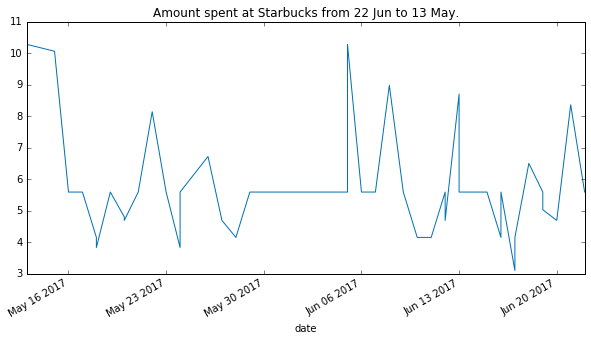

In [141]:
title = 'Amount spent at Starbucks from {} to {}.'.format(df.iloc[[0]].index.strftime('%-d %b')[0],
                                                          df.iloc[[-1]].index.strftime('%-d %b')[0])

plot = df.plot(y=['spent'], legend=False, kind='line', figsize=(10,5),
               title=title)

figure = plot.get_figure()
figure.savefig('figure.png')